# Introduction to Regression: Linear Regression

In this introduction, we will develop linear regression from basic principles.  Other tutorials will forgo the theory and focus on existing python libraries that are commonly used for building regression models.

In our line fitting exercise, we manual tweeked the model parameters.  While that was certainly fun for about 1 min, it probably became tedious.  We want to automate the process.

In [1]:
# All good python projects begin with specifying which modules to load

import pandas as pd  # Pandas is a package which creates data frames
import numpy as np # Numpy is the package which creates/manages/operates on numerical data
import matplotlib.pyplot as plt # Matplotlib is the plotting library

# This allow for multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## The Data

Every project begins with the data.  We will be using example data that _Fedor Karmanov_ has created based on some published literature.  Visit Fedor's github repo to learn more (https://github.com/fed-ka/springboard)

//=-=-=-=-=-=-=-=-=-=-=-=-=-=

Dataset:  lsd.dat
Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

Tissue Concentration    1-4 <br>
Math Score             8-12

//=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [2]:
# Pull the data directly from github
lsd = 'https://raw.githubusercontent.com/fed-ka/springboard/master/5.%20Linear%20Regressions%20in%20Python/lsd.csv'
data = pd.read_csv(lsd)

# Skip the data exploration and just get back to a basic model

# Model
model = dict()
model['m'] = 0
model['b'] = 0

# Since there is no model yet, y_ can be filled with 0
modelData = pd.DataFrame({'x': data['Tissue Concentration'],
                          'y': data['Test Score'], 
                          'y_': np.zeros(data['Test Score'].count())})


print('Model')
model
print('Model Data')
modelData


Model


{'b': 0, 'm': 0}

Model Data


,x,y,y_
0,1.17,78.93,0.0
1,2.97,58.20,0.0
2,3.26,67.47,0.0
3,4.69,37.47,0.0
4,5.83,45.65,0.0
5,6.00,32.92,0.0
6,6.41,29.97,0.0


## Formalize the problem

We know:

$y_i = m*x_i + b$ _for all i samples_

The model that we are building is:

$\bar{y} = m*x + b$

The error that we have defined is:

$sse = \frac{1}{N} \sum{( y_i - \bar{y}(x_i) )^2}$

The expanded form of this is:

$sse = \frac{1}{N} \sum{(y_i - (m*x_i + b))^2}$

We want to minimize the error.  This is accomplished with gradient descent.  To use the gradient descent, we need the gradient with respect to each of the parameters that we are tweeking:

$\begin{aligned}
\frac{\partial}{\partial m} sse &= \\
&= \frac{\partial}{\partial m} \frac{1}{N} \sum{(y_i - (m*x_i + b))^2} \\
&= \frac{1}{N} \sum{ \frac{\partial}{\partial m}  (y_i - (m*x_i + b))^2}\\
&= \frac{2}{N} \sum{ -x_i (y_i - (m*x_i + b))} \\
&= \frac{2}{N} \sum{ -x_i (y_i - \bar{y_i})}
\end{aligned}$

$\begin{aligned}
\frac{\partial}{\partial b} sse &= \\
&= \frac{\partial}{\partial b} \frac{1}{N} \sum{(y_i - (m*x_i + b))^2} \\
&= \frac{1}{N} \sum{ \frac{\partial}{\partial b}  (y_i - (m*x_i + b))^2}\\
&= \frac{2}{N} \sum{ -(y_i - (m*x_i + b))} \\
&= \frac{2}{N} \sum{ -(y_i - \bar{y_i})}
\end{aligned}$

Now we can convert this into code.

In [3]:
def computeModelAndError (model, modelData):
    
    # Compute model
    modelData['y_'] = model['m'] * modelData['x']  +  model['b']

    # Compute SSE
    modelData['delta'] = modelData['y'] - modelData['y_']
    modelData['squared'] = modelData['delta']*modelData['delta']

    model['sse'] = sum(modelData['squared'])/modelData['squared'].count()
    
    return model, modelData

In [4]:
def gradSSE(model, modelData):
    # We are going to be summing the gradient for each point that we are testing with
    b_gradient = 0 
    m_gradient = 0     
    N = float(modelData.x.count())

    for i in range(0, modelData.x.count()): 
        m_gradient += -(modelData.x[i] * (modelData.y[i] - modelData.y_[i]))
        b_gradient += -(modelData.y[i] - modelData.y_[i]) 

    model['gradm'] = (2/N*m_gradient)
    model['gradb'] = (2/N*b_gradient)
    
    return model

In gradient descent, you take the existing model parameters (m and b) and adjust them based on the gradient (which will point downhill).  The rate at which you adjust the parameters is called the "learning rate."

In [5]:
def gradDescent(model,modelData,learningRate):
    # Given the current model, determine the gradients
    model = gradSSE(model,modelData)
    
    # Given the gradients, we can estimate new parameters
    model['m'] = model['m'] - (learningRate * model['gradm']) 
    model['b'] = model['b'] - (learningRate * model['gradb']) 
    
    return model    
    


# Apply the learning

Stepping through the learning one step at a time:

1) Start with a guess
2) Compute the model
3) Apply Gradient Descent
4) Compute the new model

Current Model


{'b': 85, 'm': -9.090909090909092, 'sse': 56.331377213695454}

,x,y,y_,delta,squared
0,1.17,78.93,74.363636,4.566364,20.851677
1,2.97,58.20,58.000000,0.200000,0.040000
2,3.26,67.47,55.363636,12.106364,146.564040
3,4.69,37.47,42.363636,-4.893636,23.947677
4,5.83,45.65,32.000000,13.650000,186.322500
5,6.00,32.92,30.454545,2.465455,6.078466
6,6.41,29.97,26.727273,3.242727,10.515280


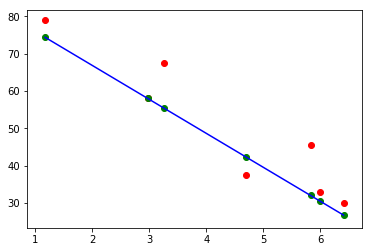

New Model


{'b': 85.089535064935063,
 'gradb': -8.9535064935065023,
 'gradm': -39.317241558441594,
 'm': -8.6977366753246752,
 'sse': 43.782784733072205}

,x,y,y_,delta,squared
0,1.17,78.93,74.913183,4.016817,16.134818
1,2.97,58.20,59.257257,-1.057257,1.117793
2,3.26,67.47,56.734914,10.735086,115.242082
3,4.69,37.47,44.297150,-6.827150,46.609978
4,5.83,45.65,34.381730,11.268270,126.973903
5,6.00,32.92,32.903115,0.016885,0.000285
6,6.41,29.97,29.337043,0.632957,0.400635


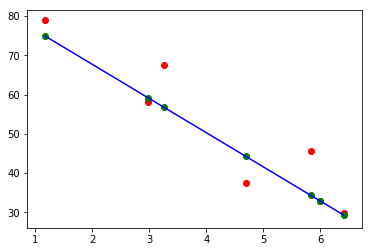

In [6]:
# Step 1 - Pulled from manual task
learningRate = .01
model['m'] = (80-30)/(1-6.5)
model['b'] = 85


# Step 2 - Compute model
[model,modelData] = computeModelAndError (model, modelData)
    
print('Current Model')
model
modelData

plt.scatter(modelData['x'],modelData['y'],color='r')
plt.scatter(modelData['x'],modelData['y_'],color='g')
plt.plot(modelData['x'],modelData['y_'],color='b')
plt.show()

# Step 3 - Apply grad 

model = gradDescent(model,modelData,learningRate)
        
# Step 4 - Compute new model
[model,modelData] = computeModelAndError (model, modelData)
print('New Model')
model
modelData

plt.scatter(modelData['x'],modelData['y'],color='r')
plt.scatter(modelData['x'],modelData['y_'],color='g')
plt.plot(modelData['x'],modelData['y_'],color='b')
plt.show()

Initial Model


{'b': 85,
 'gradb': -8.9535064935065023,
 'gradm': -39.317241558441594,
 'm': -9.090909090909092,
 'sse': 56.331377213695454}

,x,y,y_,delta,squared
0,1.17,78.93,74.363636,4.566364,20.851677
1,2.97,58.20,58.000000,0.200000,0.040000
2,3.26,67.47,55.363636,12.106364,146.564040
3,4.69,37.47,42.363636,-4.893636,23.947677
4,5.83,45.65,32.000000,13.650000,186.322500
5,6.00,32.92,30.454545,2.465455,6.078466
6,6.41,29.97,26.727273,3.242727,10.515280


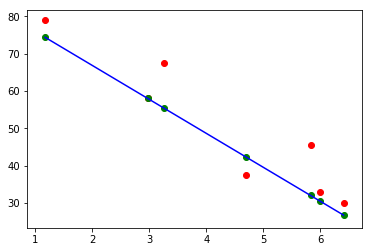

Final Model


{'b': 85.280974529317433,
 'gradb': -1.1154303258684146,
 'gradm': 0.052262963522315832,
 'm': -8.2492119709788003,
 'sse': 38.425716333505029}

,x,y,y_,delta,squared
0,1.17,78.93,75.629397,3.300603,10.893983
1,2.97,58.20,60.780815,-2.580815,6.660606
2,3.26,67.47,58.388544,9.081456,82.472852
3,4.69,37.47,46.592170,-9.122170,83.213993
4,5.83,45.65,37.188069,8.461931,71.604281
5,6.00,32.92,35.785703,-2.865703,8.212252
6,6.41,29.97,32.403526,-2.433526,5.922048


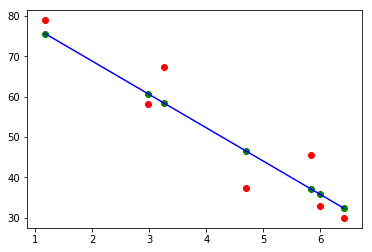

In [7]:
# Initialize

# Step 1 - Pulled from manual task
learningRate = .01
model['m'] = (80-30)/(1-6.5)
model['b'] = 85

# Step 2 - Compute model
[model,modelData] = computeModelAndError (model, modelData)
    
print('Initial Model')
model
modelData

# The use of "_ =" suppresses the intermediate output.
_ = plt.scatter(modelData['x'],modelData['y'],color='r')
_ = plt.scatter(modelData['x'],modelData['y_'],color='g')
_ = plt.plot(modelData['x'],modelData['y_'],color='b')
plt.show()

# Run it with a loop

runs = pd.DataFrame({'m': {}, 'b': {}, 'sse': {}})

runs = runs.append({'m': model['m'], 'b': model['b'], 'sse': model['sse']}, ignore_index=True)
for i in range(0,10):
    # Step 3 - Apply grad 
    model = gradDescent(model,modelData,learningRate)

    # Step 4 - Compute new model
    [model,modelData] = computeModelAndError (model, modelData)
    
    runs = runs.append({'m': model['m'], 'b': model['b'], 'sse': model['sse']}, ignore_index=True)

print('Final Model')
model
modelData

_ = plt.scatter(modelData['x'],modelData['y'],color='r')
_ = plt.scatter(modelData['x'],modelData['y_'],color='g')
_ = plt.plot(modelData['x'],modelData['y_'],color='b')
plt.show()



Runtime Paramers


,b,m,sse
0,85.000000,-9.090909,56.331377
1,85.089535,-8.697737,43.782785
2,85.143208,-8.485196,40.072197
3,85.177390,-8.370758,38.968726
4,85.200971,-8.309599,38.634361
5,85.218780,-8.277374,38.526919
6,85.233441,-8.260861,38.486466
7,85.246378,-8.252880,38.465822
8,85.258364,-8.249528,38.451070
9,85.269820,-8.248689,38.438106


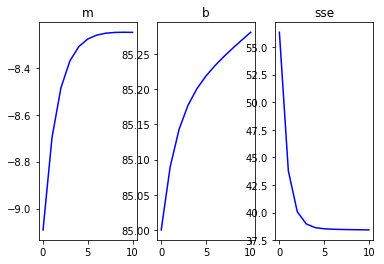

In [8]:
print('Runtime Paramers')
runs
_ = plt.subplot(131)
_ = plt.plot(runs.index,runs.m,color='b')
_ = plt.title('m')
_ = plt.subplot(132)
_ = plt.plot(runs.index,runs.b,color='b')
_ = plt.title('b')
_ = plt.subplot(133)
_ = plt.plot(runs.index,runs.sse,color='b')
_ = plt.title('sse')
plt.show()

<font color='red'>
# Adjust the starting values for m and b
# Adjust the learning rate.  Observe the impact